# Algorithmic Machine Learning assignment
due date: 27.05.2016 <br>
student: Adrian Simon Bauer

## Excercise 1:

In [1]:
import numpy as np
import pandas as pd

# read the datafiles
redWine = pd.read_csv('winequality-red.csv', sep=';', header=0)
whiteWine = pd.read_csv('winequality-white.csv', sep=';', header=0)

## TODO: check for NA-data

In [2]:
redWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [3]:
whiteWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6


## Excercise 2: Histogram of the wine quality

In [4]:
histogramRed = redWine.groupby('quality').size()
histogramWhite = whiteWine.groupby('quality').size()

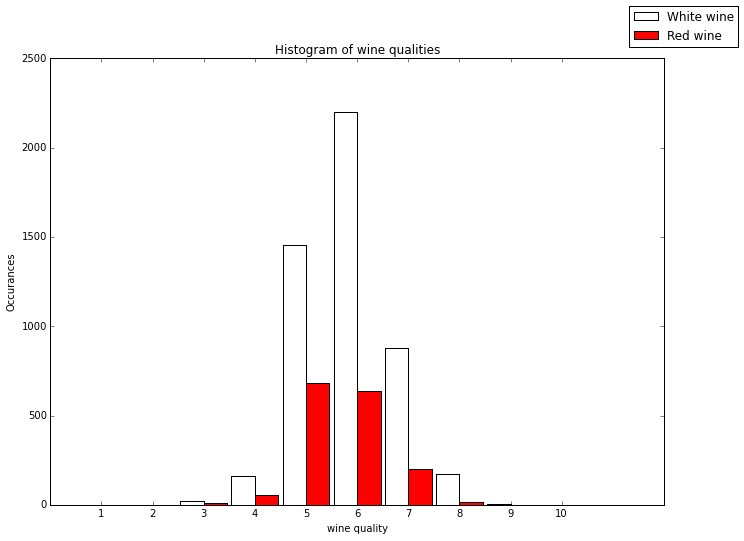

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline


figWidth = 11
fig = plt.figure(figsize=(figWidth,8))

redKeys = list(histogramRed.keys())
whiteKeys = list(histogramWhite.keys())

redValues = np.zeros(10)
whiteValues = np.zeros(10)

## the code below can be used for normalization of the values
#sumRedWine = sum(histogramRed)
#sumWhiteWine = sum(histogramWhite)

for key in redKeys:
    redValues[key-1] = histogramRed[key]# / sumRedWine
for key in whiteKeys:
    whiteValues[key-1] = histogramWhite[key]# / sumWhiteWine

ind = np.arange(1, 11)                # the x locations for the groups
width = figWidth / (2*12.0)

white = plt.bar(ind-width, whiteValues, width,
                color='white')

red = plt.bar(ind, redValues, width,
                    color='red')

# axes and labels
plt.ylabel('Occurances')
plt.xlabel('wine quality')
plt.title('Histogram of wine qualities')
xTickMarks = ind+width
plt.xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

## add a legend
fig.legend( (white[0], red[0]), ('White wine', 'Red wine') )

plt.show()

## Excercise 3
When we look at this figure, we can clearly observe, that we have a higher number of samples for the white wine than for the red wine. So we can assume that we will be able to observe more precise results for the white wines as the 'noise' on our measurements won't influence the analysis as much as it does on the red wine.
<br> Also we can see, that the most wines have a qualitu in the range from 5-7 while there are very few wines, that have a quality of 3, 4, 8, and 9 and even no whine that has quality 1, 2 or 10. This means, that the linear regression will very likely be biased towards assigning the wines a quality between 5 and 7 as this happens most often.
<br><br> From a first glance it seems that both distributions follow a gaussian distribution with a mean value around 5-6.

## Excercise 4 (linear regression)
### 4.a) create training- and test-data 

In [84]:
# define the proportion
trainingSize = 0.7
testSize = 0.3

# create randomly shuffled list of indexes
indexes = np.arange(len(redWine))
np.random.shuffle(indexes)

# split the indexes into training and test indexes
trainingInd = indexes[:int(trainingSize*len(indexes))]
testInd = indexes[int(trainingSize*len(indexes))+1:]

# split the data accordingly to the indexes
trainRed = redWine.ix[trainingInd,:]
testRed = redWine.ix[testInd,:]
trainRed.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1136,10.4,0.52,0.45,2.0,0.080,6,13,0.99774,3.22,0.76,11.4,6
769,7.9,0.72,0.01,1.9,0.076,7,32,0.99668,3.39,0.54,9.6,5
28,7.1,0.71,0.00,1.9,0.080,14,35,0.99720,3.47,0.55,9.4,5
800,7.2,0.61,0.08,4.0,0.082,26,108,0.99641,3.25,0.51,9.4,5
1569,6.2,0.51,0.14,1.9,0.056,15,34,0.99396,3.48,0.57,11.5,6


In [85]:
testRed.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1038,8.7,0.41,0.41,6.2,0.078,25,42,0.99530,3.24,0.77,12.6,7
838,10.1,0.31,0.35,1.6,0.075,9,28,0.99672,3.24,0.83,11.2,7
241,12.0,0.38,0.56,2.1,0.093,6,24,0.99925,3.14,0.71,10.9,6
426,6.4,0.67,0.08,2.1,0.045,19,48,0.99490,3.49,0.49,11.4,6
806,8.4,0.25,0.39,2.0,0.041,4,10,0.99386,3.27,0.71,12.5,7


### 4.b) fit linear regression

In [104]:
def featurizeData(data, order=1):
        # add the '1' column to the data
        data['1'] = 1
        return data.as_matrix()

def linearRegression(data, targets, order=1):
    features = featurizeData(data, order)
    targetVec = targets.as_matrix()
    
    weights = np.dot(np.linalg.inv(np.dot(np.transpose(features), features)),np.dot(np.transpose(features),targetVec))
    return weights

In [148]:
w = linearRegression(trainRed.loc[:,:'alcohol'], trainRed.loc[:,'quality'],1)

In [149]:
def predict(data, weights, targets=[]):
    withTargets = len(targets)!= 0
    
    if withTargets:
        targetVec = targets.as_matrix()
    
    result = []
    features = featurizeData(data)
    for ind in range(len(features)):
        predict = np.dot(weights, features[ind,:])
        if withTargets:
            result.append((predict, targetVec[ind]))
        else:
            result.append((predict, none))
    return result

In [150]:
predictions = predict(testRed.loc[:,:'alcohol'], w, testRed.loc[:,'quality'])

### 4.c) make predictions

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


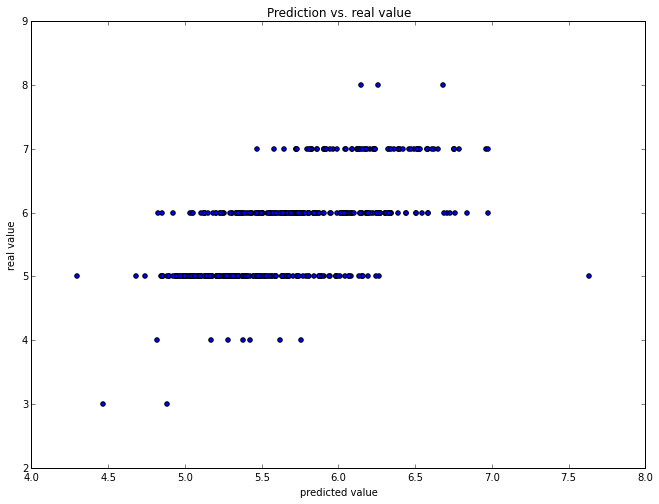

In [151]:
fig = plt.figure(figsize=(11,8))
predVals = np.array(list(map(lambda l: l[0], predictions)))
targetVals = np.array(list(map(lambda l: l[1], predictions)))

plt.scatter(predVals, targetVals)
plt.xlabel('predicted value')
plt.ylabel('real value')
plt.title('Prediction vs. real value')

In [152]:
def computeMeanSquaredError(predictions, targets):
    return ((predictions - targets) **2).mean()

mse = computeMeanSquaredError(predVals, targetVals)
print('The mean squared error is %.4f' %mse)

The mean squared error is 0.3712


### 4.d) Suggest Benchmark
As a very easy benchmark we could suggest to use the most frequent value for prediction. This is comparable to a linear regression of order 0.
<br> Another possible benchmark could be to calculate the Pearson correlation coefficient. This correlation should be 1 for a perfect linear regression.

### 4.e) Implement Benchmark

In [153]:
def benchmarkMFV(targets):
    targetVec = targets.as_matrix()
    predictValue = np.mean(targetVec)
    
    predictions = np.empty_like(targetVec)
    predictions.fill(predictValue)
    
    return computeMeanSquaredError(predictions, targetVec)

benchmarkMFV(testRed.loc[:, 'quality'])

1.0438413361169103

In [154]:
def calculatePearsonCoefficient(predictions, targets):
    assert (len(predictions) == len(targets)), "The dimensions of predictions and targets must fit!"
    
    predMean = np.mean(predictions)
    tarMean = np.mean(targets)
    
    return np.mean((predictions - predMean)*(targets - tarMean)) / (np.std(targets) * np.std(predictions))

calculatePearsonCoefficient(predVals, targetVals)



0.61164402869780254

### 4.f) Discussion of Benchmarks
Both benchmarks show, that our linear regression is on a good way, but it's still not perfect. When compare the mean squared error (MSE) for our predictions with the MSE we achieved by just assigning the most common quality value, we can observe that our MSE is significantly smaller. Still, the MSE is not perfect.
<br> The same goes for the Pearson correlation coefficien that is computed as <br> $\begin{equation} corr(X,Y) = \dfrac{cov(X,Y)}{\sigma_X \cdot \sigma_Y} \end{equation}$ <br>
Our result of a correlation coefficient of .63 shows that the regression model is able to create a correlation between the predicted quality and the real quality. This correlation is moderate but way better than guessing.

## Excercise 5 (Regularized Linear Regression)
### 5.a) Implementation of regularized Linear Regression aka Ridge Regression

In [156]:
def ridgeRegression(data, targets, lambda_, order=1):
    features = featurizeData(data, order)
    targetVec = targets.as_matrix()
    
    weights = np.dot(np.linalg.inv(np.dot(np.transpose(features), features) + (lambda_ * np.identity(len(features[0])) )), \
                     np.dot(np.transpose(features),targetVec))
    return weights

In [157]:
wRidge = ridgeRegression(trainRed.loc[:,:'alcohol'], trainRed.loc[:,'quality'],1)
predictionsRidge = predict(testRed.loc[:,:'alcohol'], wRidge, testRed.loc[:,'quality'])

In [212]:
def findGoodLambda(trainData, trainTargets, testData, testTargets, lambdaMin, lambdaMax, stepsize):
    results = []
    def mseFromPredictions(predictions):
        predVals = np.array(list(map(lambda l: l[0], predictions)))
        targetVals = np.array(list(map(lambda l: l[1], predictions)))
        return computeMeanSquaredError(predVals, targetVals)
    
    for value in np.arange(lambdaMin, lambdaMax, stepsize):
        weights = ridgeRegression(trainData, trainTargets, value)
        predictions = predict(testData, weights, testTargets)
        results.append((value, mseFromPredictions(predictions)))
        
    figureWidth = 15    
    fig = plt.figure(figsize=(figureWidth,8))
    indexes = list(map(lambda l: l[0], results))
    values = list(map(lambda l: l[1], results))
    
    width = 1 / (len(results)*2.0)
    print(figureWidth, len(results), width)
    plt.bar(indexes, values, width,
                    color='red')
    plt.ylabel('MSE')
    plt.xlabel('lambda value')
    plt.title('MSE vs lambda')
    xTickMarks = ind+(width/2)
    plt.xticks(ind)
    xtickNames = ax.set_xticklabels(xTickMarks)
    plt.setp(xtickNames, rotation=45, fontsize=10)

    plt.xlim(lambdaMin, lambdaMax)
    plt.show()
    
    return results

15 19 0.02631578947368421


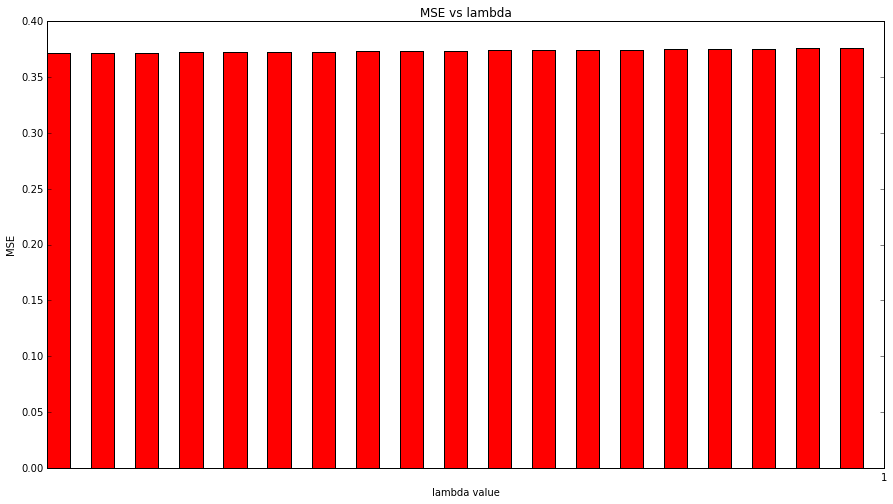

In [213]:
res = findGoodLambda(trainRed.loc[:,:'alcohol'], trainRed.loc[:,'quality'], testRed.loc[:,:'alcohol'],\
               testRed.loc[:,'quality'], 0.05, 1, 0.05)

### 5.b) Determining Parameter for Lambda